# My Project 3: Exploring GapMinder Data
### Will Rodman | Data Science | November 2023

In the third and final project assignment for Tulane Universities Data Science class, I look into the world of linear regression using from [gapminder.org](https://www.gapminder.org/).

I'll be working with a dataset on [GitHub page](https://github.com/jennybc/gapminder).


## Project Start

Before anything, project packages and libraries are installed. 

In [3]:
# Importing packages.  
%pip install requests pandas matplotlib --quiet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importing libraries. 
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt


In [4]:
# Downloading data from github.
url = 'https://raw.githubusercontent.com/jennybc/gapminder/main/data-raw/08_gap-every-five-years.tsv'
response = requests.get(url)

if response.status_code != 200:
    print("Url Request Failed.")

In [9]:
# Loading data into Pandas DataFrame. 
df = pd.read_csv(StringIO(response.text), sep='\t')
print(df.shape)
df.head()

(1704, 6)


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Part 1: Exploring Life Expectancy Changes and Economic Measures

In Part 1 of this project, I focus is on understanding how life expectancy has evolved globally over a 50-year period and exploring its relationship with economic indicators such as GDP.

### Exercise 1: Visualizing Life Expectancy

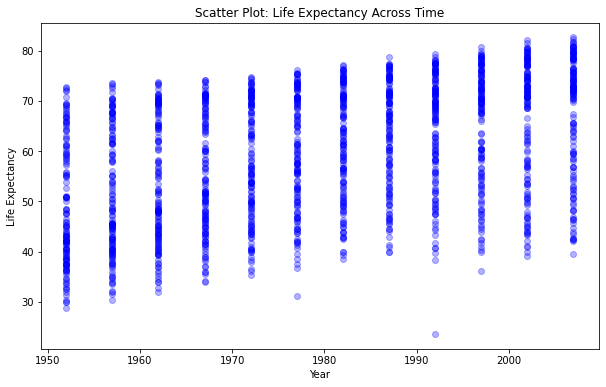

In [16]:
# Scatter plot of life expectancy across time
plt.figure(figsize=(10, 6))
for country, data in df.groupby('country'):
    plt.scatter(data['year'], data['lifeExp'], label=country, c='blue', alpha=0.3)

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Life Expectancy Across Time')
plt.show()

### Question 1: Analyzing Life Expectancy Trends

Based on the scatter plot, there's a trend in life expectancy over time. This trend in increasing and appears to be linear. 

### Visualizing Life Expectancy with a Violin Plot

Text(0.5, 1.0, 'Violin Plot')

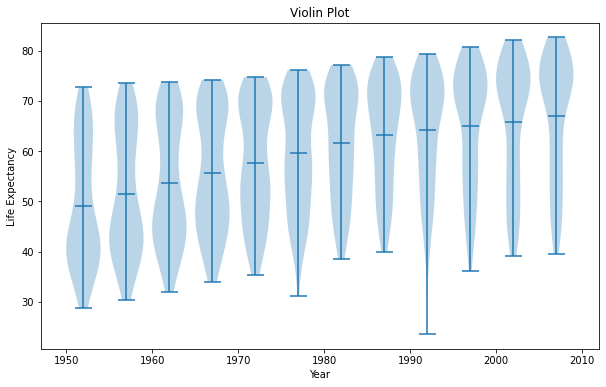

In [31]:
# Wrangling data for plot. 
plt.figure(figsize=(10, 6))
life_exp_per_year = df.groupby('year')['lifeExp'].apply(list).reset_index(name='values')
y =life_exp_per_year['values'].to_list()
x = life_exp_per_year['year'].to_list()

plt.violinplot(y, x, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Violin Plot")



### Question 2: Describing Life Expectancy Distribution

Based on the violin plot, the range of each sample dist. remain consistent over time. However, the skew appear to transition from a positive skew to a negative skew as time increases. Always remaining unimodal, but never symmetric around its center.

### Question 3: Intuition on Linear Regression

Using my own intuition, I believe there could be a linear relationship modeled because the center of each dist. displays an increasing trend over time. In this case, the null hypothesis would be rejected in favor of the alternative hypothesis. 

## Understanding Model Residuals

The next set of questions revolves around model residuals, which are the errors in every prediction made by the model. According to NIST, residuals are estimates of experimental error obtained by subtracting the observed responses from the predicted responses.

### Question 4: Intuition on Residuals Violin Plot

Consider a violin plot of residuals from the linear model (as mentioned in Question 3) vs. year. Without performing the analysis, provide an intuitive description of how you think this violin plot might look.

### Question 5: Assumptions of Linear Regression Model

Think about the assumptions of the linear regression model, such as assumptions about noise, input distributions, etc. What should the violin plot of residuals look like according to these assumptions? Do you believe everything is okay based on your considerations?

Feel free to explore additional resources to enhance your understanding of these concepts. Let's unravel the intricacies of data distributions and model evaluations! 📊💡
